# Zebrafish pigmentation

This tutorial uses data from [Saunders, et al (2019)](https://elifesciences.org/articles/45181). Special thanks also go to [Lauren](https://twitter.com/LSaund11) for the tutorial improvement. 

In this [study](https://elifesciences.org/articles/45181), the authors profiled thousands of neural crest-derived cells from trunks of post-embryonic zebrafish. These cell classes include pigment cells, multipotent pigment cell progenitors, peripheral neurons, Schwann cells, chromaffin cells and others. These cells were collected during an active period of post-embryonic development, which has many similarities to fetal and neonatal development in mammals, when many of these cell types are migrating and differentiating as the animal transitions into its adult form. This study also explores the role of thyroid hormone (TH), a common endocrine factor, on the development of these different cell types. 

Such developmental and other dynamical processes are especially suitable for dynamo analysis as dynamo is designed to accurately estimate direction and magnitude of expression dynamics (`RNA velocity`), predict the entire lineage trajectory of any intial cell state (`vector field`), characterize the structure (`vector field topology`) of full gene expression space, as well as fate commitment potential (`single cell potential`). 

Import the package and silence some warning information (mostly `is_categorical_dtype` warning from anndata)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import dynamo as dyn 
from dynamo.configuration import DKM
import numpy as np
import matplotlib.pyplot as plt

this is like R's sessionInfo() which helps you to debug version related bugs if any. 

## Load data

In [2]:
adata = dyn.sample_data.pancreatic_endocrinogenesis()
adata_origin = dyn.sample_data.pancreatic_endocrinogenesis()
monocle_adata = dyn.sample_data.pancreatic_endocrinogenesis()

|-----> Downloading data to ./data/endocrinogenesis_day15.h5ad
|-----> Downloading data to ./data/endocrinogenesis_day15.h5ad
|-----> Downloading data to ./data/endocrinogenesis_day15.h5ad


In [3]:
print(adata.X.min(), adata.X.max(), adata.X.mean())
adata.layers["spliced"] = adata.layers["spliced"].toarray()
temp = adata.layers["spliced"][~np.isnan(adata.layers["spliced"])]
print("unspliced data ")
print(temp.min(), temp.max(), temp.mean(),  temp.std())
adata.layers["unspliced"] = adata.layers["unspliced"].toarray()
temp = adata.layers["unspliced"][~np.isnan(adata.layers["unspliced"])]
print(temp.min(), temp.max(), temp.mean(), temp.std())

0.0 2286.0 0.23841056
unspliced data 
0.0 2286.0 0.23841062 2.2769988
0.0 1418.0 0.04639706 0.9100693


## Apply normalization on different layers according `select_genes_key`. We may use other select_genes function combined with pearson residual normalization.

In [4]:
dyn.preprocessing.recipe_monocle(monocle_adata)

|-----> recipe_monocle_keep_filtered_cells_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_filtered_cells_key=True
|-----> recipe_monocle_keep_filtered_genes_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_filtered_genes_key=True
|-----> recipe_monocle_keep_raw_layers_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_raw_layers_key=True
|-----> apply Monocole recipe to adata...
|-----> <insert> pp to uns in AnnData Object.
|-----------> <insert> has_splicing to uns['pp'] in AnnData Object.
|-----------> <insert> has_labling to uns['pp'] in AnnData Object.
|-----------> <insert> splicing_labeling to uns['pp'] in AnnData Object.
|-----------> <insert> has_protein to uns['pp'] in AnnData Object.
|-----> ensure all cell and variable names unique.
|-----> ensure all data in different layers in csr sparse matrix format.
|-----> ensure all labeling data properly collapased
|-----------> <insert> tkey to uns['

monocle select genes args
layer: X
total_szfactor: total_Size_Factor
sort_by: SVR
n top genes: 2000
SVR kwargs: {'min_expr_cells': 0, 'min_expr_avg': 0, 'max_expr_avg': inf, 'svr_gamma': None, 'winsorize': False, 'winsor_perc': (1, 99.5), 'sort_inverse': False}
onlybools: False
exprs_frac: 1
genes to exclude: None


|-----> <insert> frac to var in AnnData Object.


monocle select genes args
layer: X
total_szfactor: total_Size_Factor
sort_by: SVR
n top genes: 2000
SVR kwargs: {'min_expr_cells': 0, 'min_expr_avg': 0, 'max_expr_avg': inf, 'svr_gamma': None, 'winsorize': False, 'winsor_perc': (1, 99.5), 'sort_inverse': False}
onlybools: True
exprs_frac: 1
genes to exclude: None


|-----> size factor normalizing the data, followed by log1p transformation.
|-----> Set <adata.X> to normalized data
|-----> applying PCA ...


monocle use_for_pca inputs:
count    2.172270e+06
mean     1.147593e+00
std      6.835113e-01
min      2.884645e-01
25%      6.874647e-01
50%      8.930588e-01
75%      1.398279e+00
max      7.306362e+00
dtype: float64
monocle pca inputs:
count    2.172270e+06
mean     1.147593e+00
std      6.835113e-01
min      2.884645e-01
25%      6.874647e-01
50%      8.930588e-01
75%      1.398279e+00
max      7.306362e+00
dtype: float64


|-----> <insert> pca_fit to uns in AnnData Object.
|-----> <insert> ntr to obs in AnnData Object.
|-----> <insert> ntr to var in AnnData Object.
|-----> cell cycle scoring...
|-----> computing cell phase...
|-----> [cell phase estimation] in progress: 100.0000%
|-----> [cell phase estimation] finished [9.6916s]
|-----> <insert> cell_cycle_phase to obs in AnnData Object.
|-----> <insert> cell_cycle_scores to obsm in AnnData Object.
|-----> [Cell Cycle Scores Estimation] in progress: 100.0000%
|-----> [Cell Cycle Scores Estimation] finished [0.4239s]
|-----> [recipe_monocle preprocess] in progress: 100.0000%
|-----> [recipe_monocle preprocess] finished [4.4471s]


In [5]:
# adata = dyn.sample_data.zebrafish()
from dynamo.preprocessing import Preprocessor
import pearson_residual_normalization_recipe
preprocessor = Preprocessor()
preprocessor.config_monocle_recipe(adata)
preprocessor.preprocess_adata(adata)


|-----------> <insert> {} to uns['pp'] in AnnData Object.
|-----> Running preprocessing pipeline...
|-----------> <insert> {} to uns['pp'] in AnnData Object.
|-----------> <insert> tkey=None to uns['pp'] in AnnData Object.
|-----------> <insert> experiment_type=None to uns['pp'] in AnnData Object.
|-----> making adata observation index unique...
|-----> applying collapse species adata...
|-----> applying convert_gene_name function...
|-----> filtering outlier cells...
|-----------> filtering cells by layer:X
|-----------> filtering cells by layer:spliced
|-----------> filtering cells by layer:unspliced
|-----> skip filtering by layer:protein as it is not in adata.
|-----> <insert> pass_basic_filter to obs in AnnData Object.
|-----------> inplace subsetting adata by filtered genes
|-----> filtering outlier genes...
|-----> extra kwargs:{'filter_bool': None, 'layer': 'all', 'min_cell_s': 36.96, 'min_cell_u': 18.48, 'min_cell_p': 18.48, 'min_avg_exp_s': 0, 'min_avg_exp_u': 0, 'min_avg_exp

monocle select genes args
layer: X
total_szfactor: total_Size_Factor
sort_by: SVR
n top genes: 2000
SVR kwargs: {'min_expr_cells': 0, 'min_expr_avg': 0, 'max_expr_avg': inf, 'svr_gamma': None, 'winsorize': False, 'winsor_perc': (1, 99.5), 'sort_inverse': False}
onlybools: True
exprs_frac: 1
genes to exclude: None


|-----> appended 0 extra genes as required...
|-----> excluded 0 genes as required...
|-----> applying normalize by cells function...
|-----> reducing dimension by PCA...


preprocessor pca inputs:
count    2.172270e+06
mean     1.147593e+00
std      6.835113e-01
min      2.884645e-01
25%      6.874647e-01
50%      8.930588e-01
75%      1.398279e+00
max      7.306362e+00
dtype: float64


|-----> [preprocess] in progress: 100.0000%
|-----> [preprocess] finished [7.6146s]


## Gene set difference between Monocle and Preprocessor adata results 
If no assertion complains, it means the checked gene sets are the same

In [6]:
preprocess_genes = adata.var_names[adata.var["pass_basic_filter"]]
monocle_genes = monocle_adata.var_names[monocle_adata.var["pass_basic_filter"]]
assert not set(monocle_genes).difference(set(preprocess_genes))
assert not set(preprocess_genes).difference(set(monocle_genes))


In [7]:
preprocess_genes = adata.var_names[adata.var["use_for_pca"]]
monocle_genes = monocle_adata.var_names[monocle_adata.var["use_for_pca"]]
assert not set(monocle_genes).difference(set(preprocess_genes))
assert not set(preprocess_genes).difference(set(monocle_genes))


## Quantitative difference between Monocle and Preprocessor adata results 

In [8]:
print(np.max(np.abs(adata.layers["X_unspliced"] - monocle_adata.layers["X_unspliced"])))
print(np.max(np.abs(adata.layers["X_spliced"] - monocle_adata.layers["X_spliced"])))

4.6892617547200643e-05
9.151098674919922e-05


In [9]:
print(np.sum(np.abs(adata.X - monocle_adata.X)))
print(np.sum(np.abs(adata.layers["X_spliced"] - monocle_adata.layers["X_spliced"])))
print(np.sum(np.abs(adata.layers["X_unspliced"] - monocle_adata.layers["X_unspliced"])))
print(np.sum(np.abs(adata.obsm["X_pca"] - monocle_adata.obsm["X_pca"])))


0.0
0.7505629145520515
0.14259112826936304
0.0


In [10]:
print(np.sum(np.abs(adata.X - monocle_adata.X)))
# underlying data order not ensured
print(np.sum(np.abs(adata.X.data - monocle_adata.X.data)))
print(np.sum(np.abs(adata.X.toarray() - monocle_adata.X.toarray())))


0.0
0.0
0.0


In [11]:
indices = adata.X.nonzero()
np.array(adata.X[indices]).flatten()


array([0.8110648, 0.8110648, 1.5583358, ..., 1.6455233, 2.438802 ,
       0.7158527], dtype=float32)

In [12]:
np.array(monocle_adata.X[indices]).flatten()


array([0.8110648, 0.8110648, 1.5583358, ..., 1.6455233, 2.438802 ,
       0.7158527], dtype=float32)

## X, X_pca, X_spliced, X_unspliced plot comparison

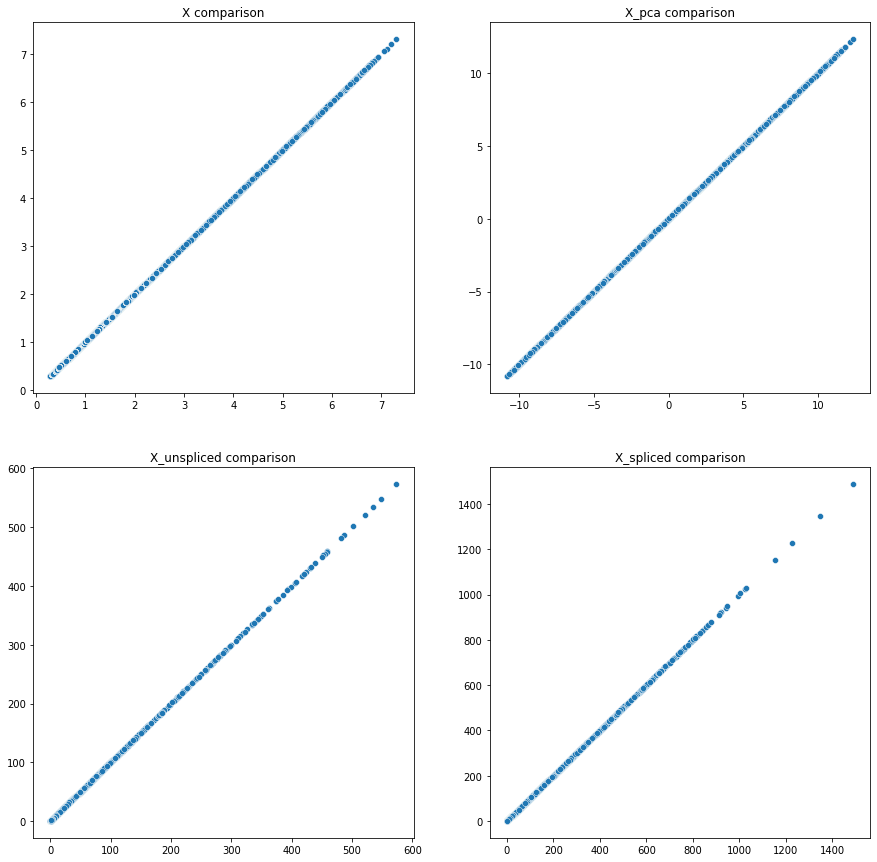

In [13]:
import seaborn as sns
import scipy.sparse


def get_nonzero_np_arr(X: scipy.sparse.csr_matrix):
    return np.array(X[X.nonzero()]).flatten()

def plot_scatter_sparse(m1: scipy.sparse.csr_matrix, m2: scipy.sparse.csr_matrix, title="", **kwargs):
    sns.scatterplot(np.array(m1[m1.nonzero()]).flatten(), np.array(m2[m1.nonzero()]).flatten(), **kwargs).set_title(title)

fig, axes = plt.subplots(2, 2, figsize=(15, 15))
plot_scatter_sparse(adata.X, monocle_adata.X, ax=axes[0][0], title="X comparison")
plot_scatter_sparse(adata.obsm["X_pca"], monocle_adata.obsm["X_pca"], ax=axes[0][1], title="X_pca comparison")
plot_scatter_sparse(adata.layers["X_unspliced"], monocle_adata.layers["X_unspliced"], ax=axes[1][0], title="X_unspliced comparison")
plot_scatter_sparse(adata.layers["X_spliced"], monocle_adata.layers["X_spliced"], ax=axes[1][1], title="X_spliced comparison")

plt.show()


## Size factor comparison

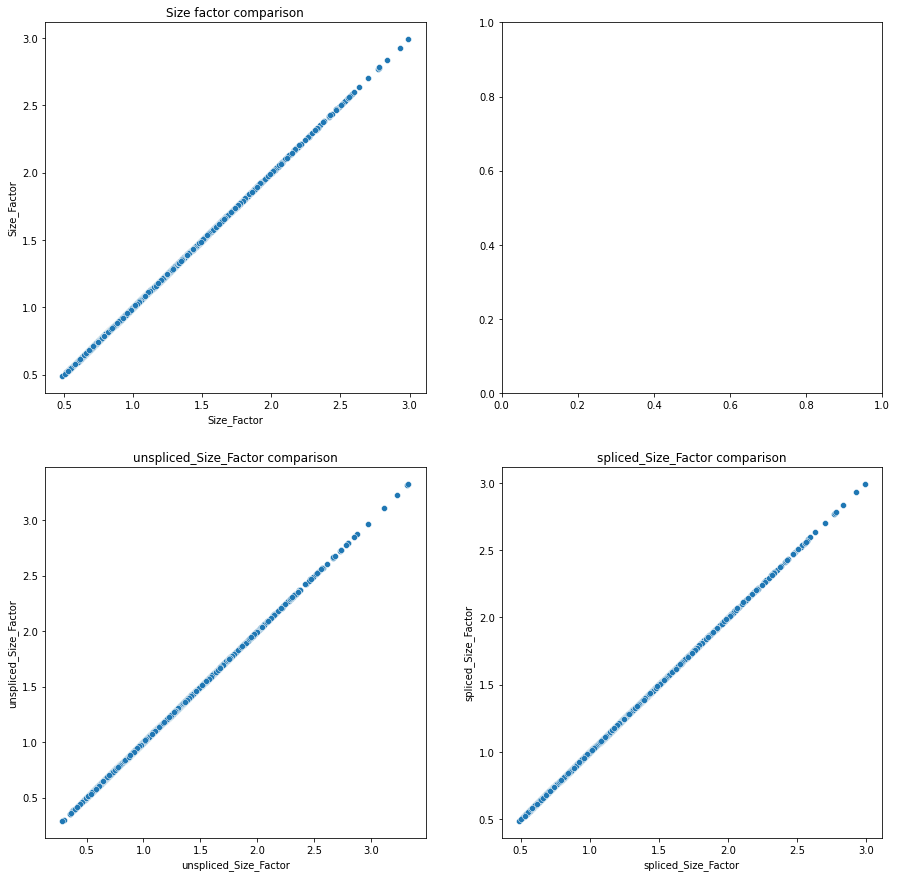

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
sns.scatterplot(adata.obs["Size_Factor"], monocle_adata.obs["Size_Factor"], ax=axes[0][0]).set_title("Size factor comparison")
sns.scatterplot(adata.obs["unspliced_Size_Factor"], monocle_adata.obs["unspliced_Size_Factor"], ax=axes[1][0]).set_title("unspliced_Size_Factor comparison")
sns.scatterplot(adata.obs["spliced_Size_Factor"], monocle_adata.obs["spliced_Size_Factor"], ax=axes[1][1]).set_title("spliced_Size_Factor comparison")
plt.show()

## Histogram showing distributions of X_pca and X

Text(0.5, 1.0, 'monocle X_pca')

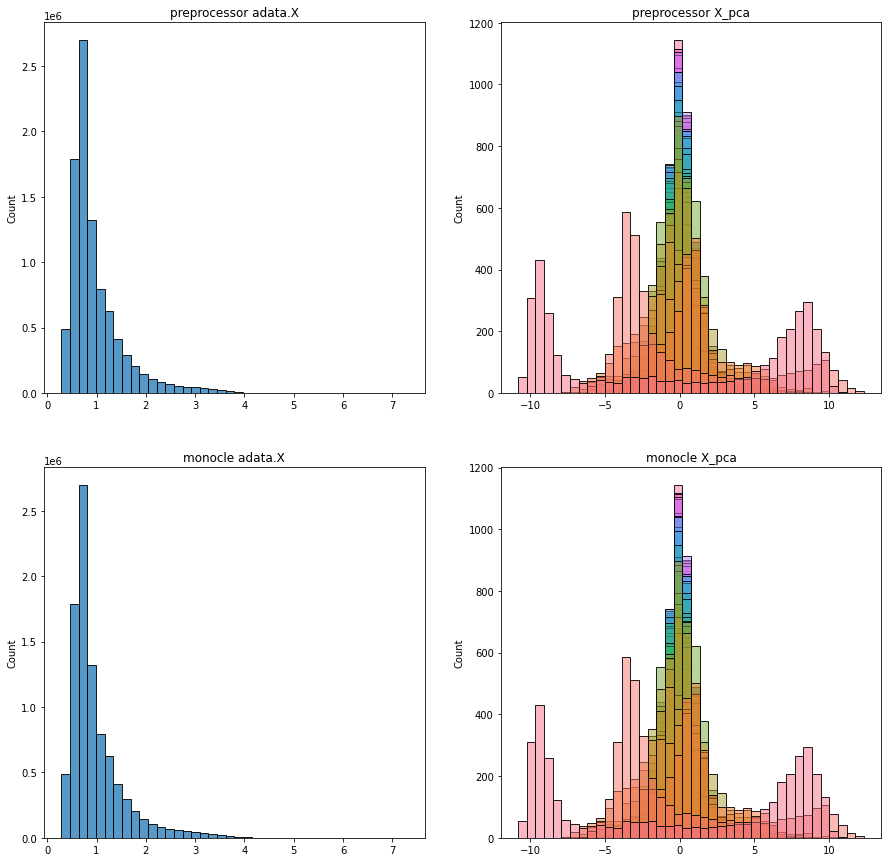

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
sns.histplot(adata.X.data, bins=40, legend=False, ax=axes[0][0]).set_title("preprocessor adata.X")
sns.histplot(adata.obsm["X_pca"], bins=40, legend=False, ax=axes[0][1]).set_title("preprocessor X_pca")
sns.histplot(monocle_adata.X.data, bins=40, legend=False, ax=axes[1][0]).set_title("monocle adata.X")
sns.histplot(monocle_adata.obsm["X_pca"], bins=40, legend=False, ax=axes[1][1]).set_title("monocle X_pca")

# _, axes = plt.subplots(2, 2, figsize=(15, 15))
# sns.histplot(adata.layers["X_unspliced"], bins=40, legend=False, ax=axes[0][0]).set_title("preprocessor X_unspliced")
# sns.histplot(monocle_adata.layers["X_unspliced"], bins=40, legend=False, ax=axes[0][1]).set_title("preprocessor X_spliced")

# sns.histplot(adata.layers["X_spliced"], bins=40, legend=False, ax=axes[1][0]).set_title("preprocessor X_unspliced")
# sns.histplot(monocle_adata.layers["X_spliced"], bins=40, legend=False, ax=axes[1][1]).set_title("preprocessor X_spliced")


|-----> retrive data for non-linear dimension reduction...
|-----? adata already have basis umap. dimension reduction umap will be skipped! 
set enforce=True to re-performing dimension reduction.
|-----> [dimension_reduction projection] in progress: 100.0000%
|-----> [dimension_reduction projection] finished [0.0010s]


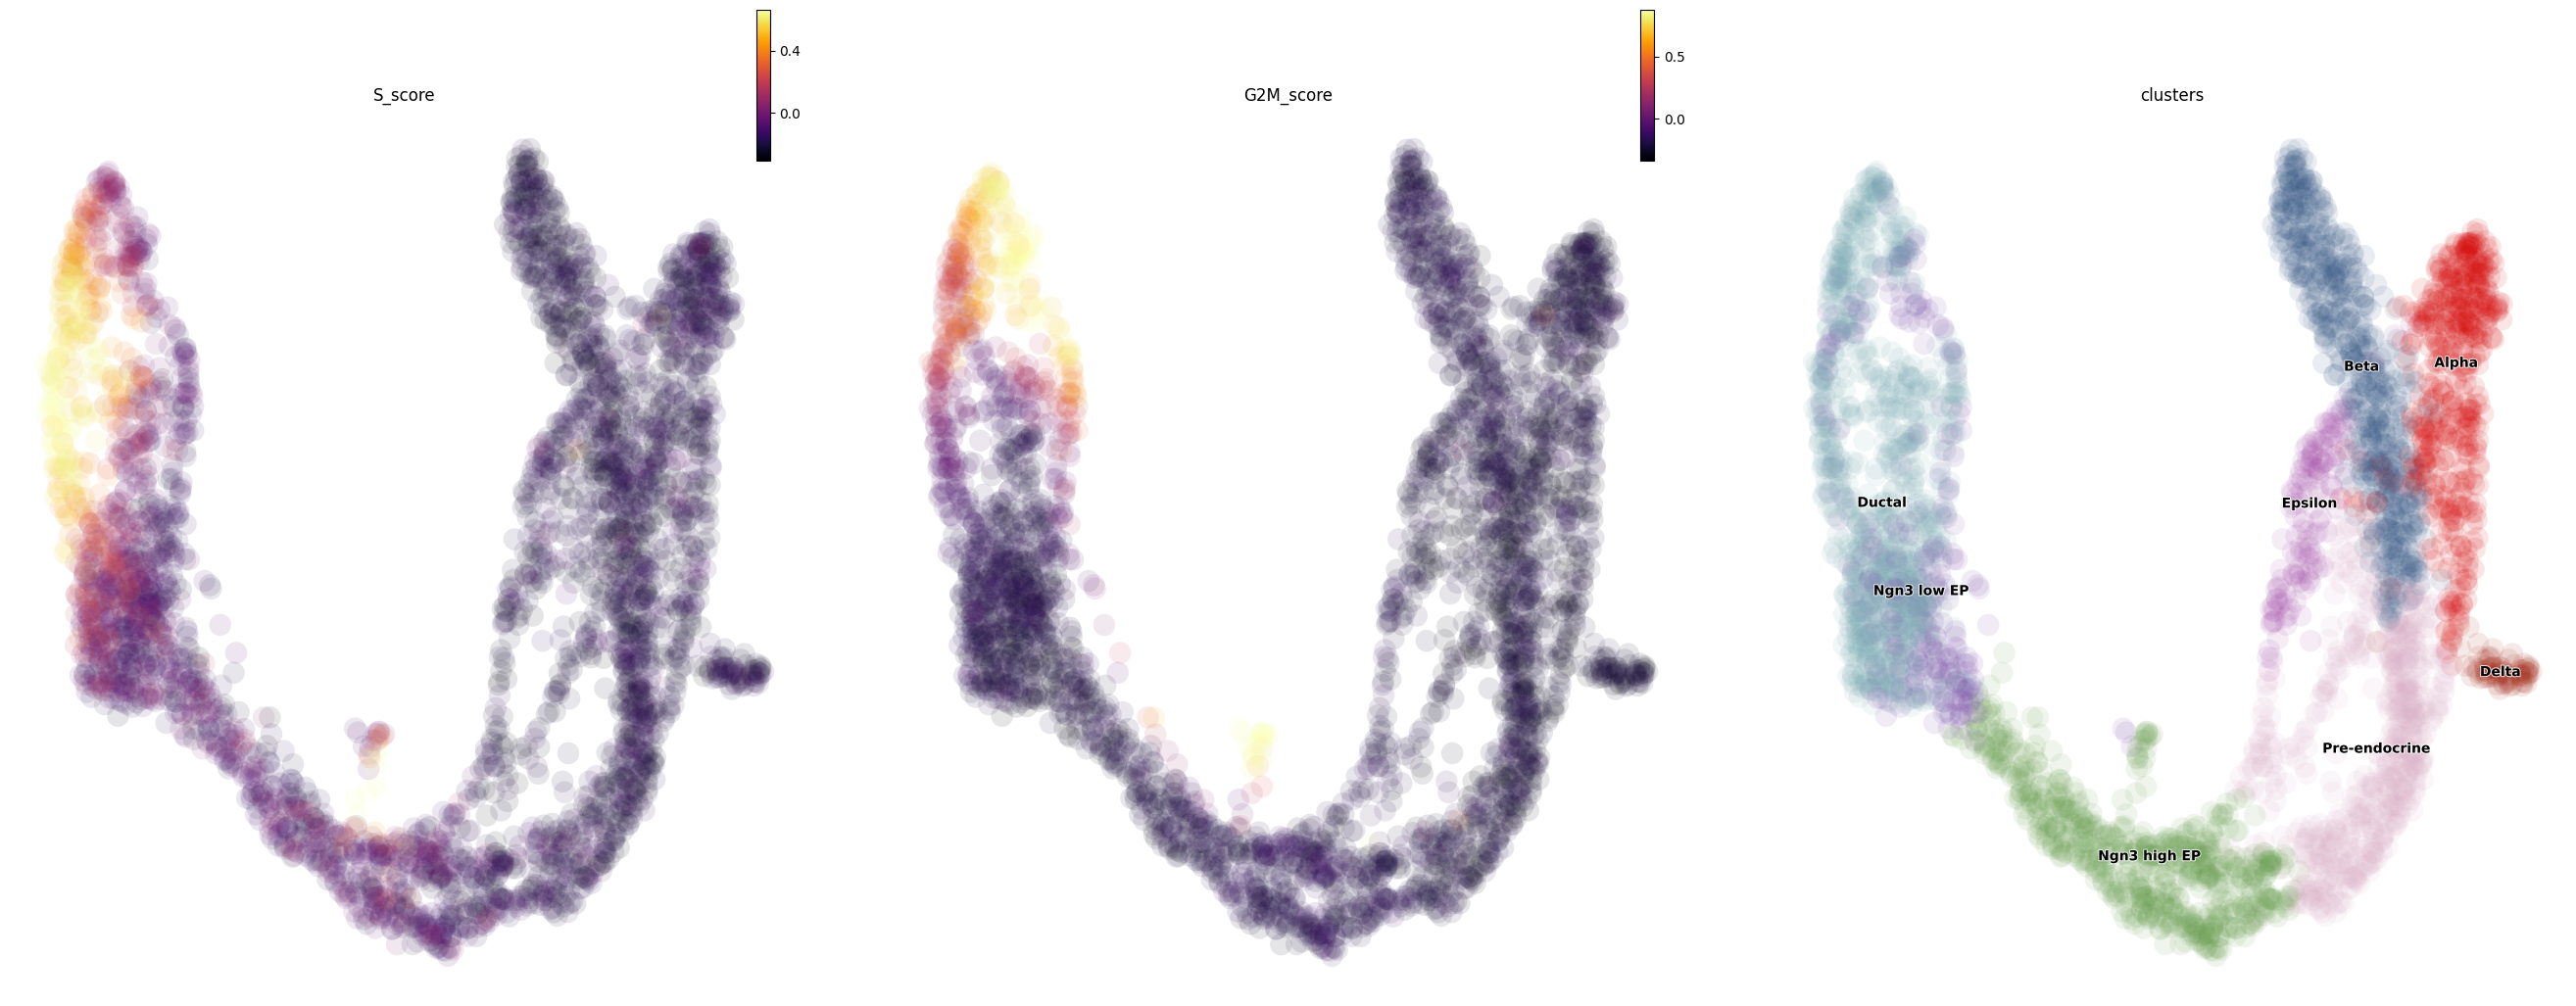

|-----> dynamics_del_2nd_moments_key is None. Using default value from DynamoAdataConfig: dynamics_del_2nd_moments_key=False
|-----> calculating first/second moments...
|-----> [moments calculation] in progress: 100.0000%
|-----> [moments calculation] finished [24.9715s]
|-----> retrive data for non-linear dimension reduction...
|-----? adata already have basis umap. dimension reduction umap will be skipped! 
set enforce=True to re-performing dimension reduction.
|-----> Start computing neighbor graph...
|-----------> X_data is None, fetching or recomputing...
|-----> fetching X data from layer:None, basis:pca
|-----> method arg is None, choosing methods automatically...
|-----------> method ball_tree selected
|-----> <insert> connectivities to obsp in AnnData Object.
|-----> <insert> distances to obsp in AnnData Object.
|-----> <insert> neighbors to uns in AnnData Object.
|-----> <insert> neighbors.indices to uns in AnnData Object.
|-----> <insert> neighbors.params to uns in AnnData O

<Figure size 600x400 with 0 Axes>

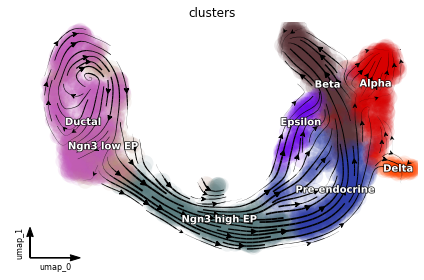

In [16]:

dyn.tl.reduceDimension(adata,basis="pca")
dyn.pl.umap(adata, color=["S_score", "G2M_score", "clusters"], figsize=(12, 12))
dyn.tl.dynamics(adata, model='stochastic', cores=3) 
dyn.pl.streamline_plot(adata, color=['clusters'], basis='umap', show_legend='on data', show_arrowed_spines=True);


|-----> retrive data for non-linear dimension reduction...
|-----? adata already have basis umap. dimension reduction umap will be skipped! 
set enforce=True to re-performing dimension reduction.
|-----> [dimension_reduction projection] in progress: 100.0000%
|-----> [dimension_reduction projection] finished [0.0010s]


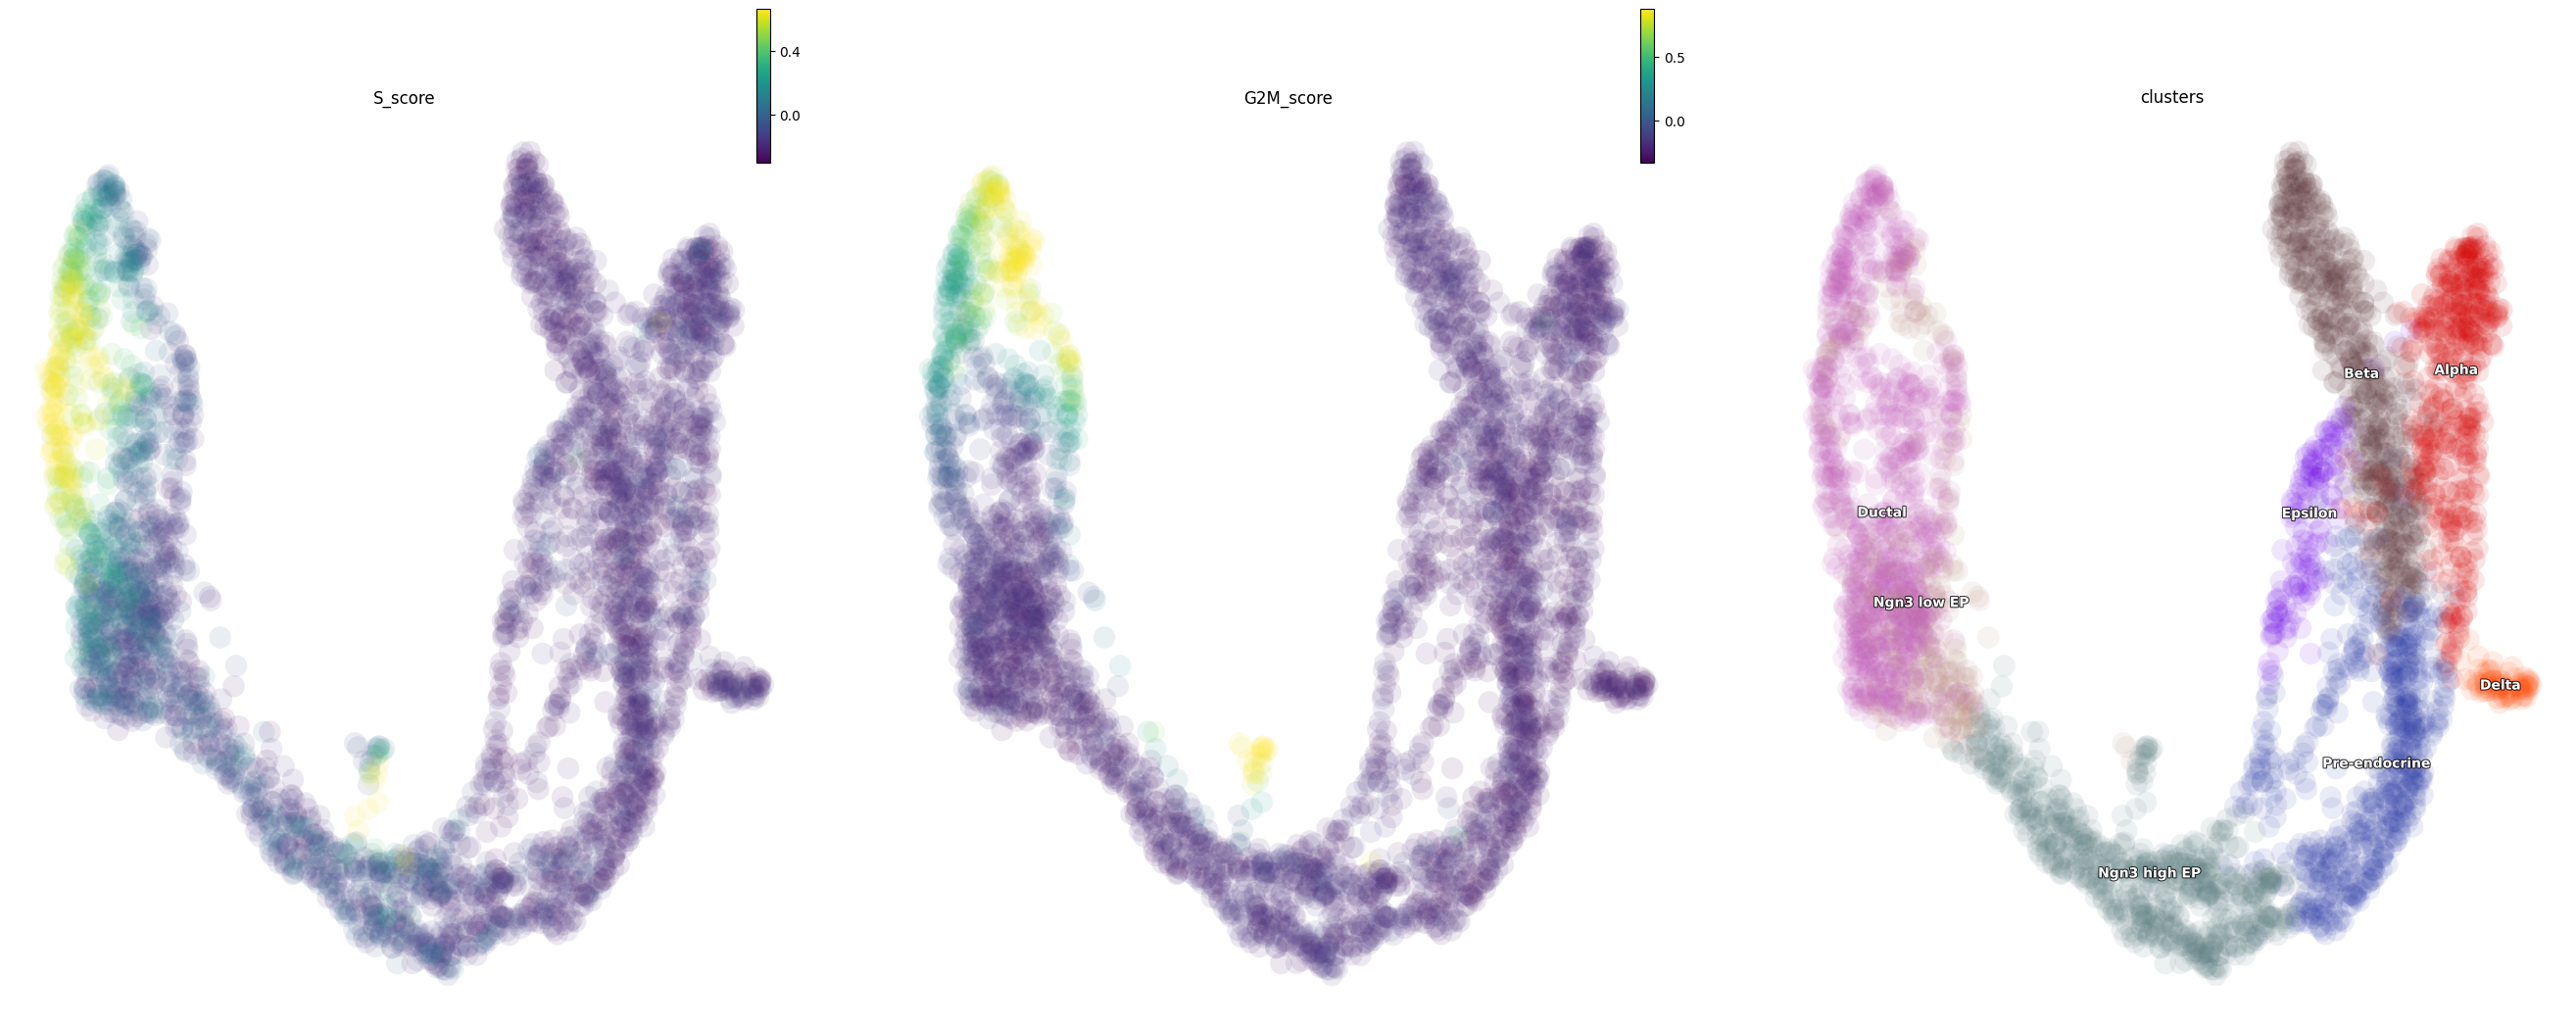

In [17]:
dyn.tl.reduceDimension(adata,basis="pca")
dyn.pl.umap(adata, color=["S_score", "G2M_score", "clusters"], figsize=(12, 12))

In [18]:
dyn.tl.dynamics(adata, model='stochastic', cores=3) 

|-----> dynamics_del_2nd_moments_key is None. Using default value from DynamoAdataConfig: dynamics_del_2nd_moments_key=False


AnnData object with n_obs × n_vars = 3696 × 27998
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'pass_basic_filter', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'Size_Factor', 'initial_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size'
    var: 'highly_variable_genes', 'pass_basic_filter', 'log_m', 'log_cv', 'score', 'frac', 'use_for_pca', 'gene_highly_variable', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics', 'use_for_transition'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca', 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'dynamics', 'grid_velocity_umap'
    obsm: 'X_pca', 'X_umap', 'X', 'velocity_umap'
    layers: 'spliced', 'unspliced', 'X_spliced', 'X_unspliced', 'M_u', 'M_uu', 'M_s', 'M_us', 'M_ss', 'velocity_S'
    obsp: 'distance

<Figure size 600x400 with 0 Axes>

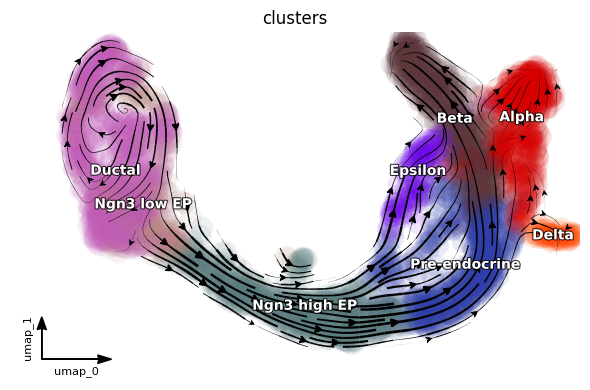

In [19]:
dyn.pl.streamline_plot(adata, color=['clusters'], basis='umap', show_legend='on data', show_arrowed_spines=True);


In [20]:
dyn.pl.phase_portraits(adata, genes=['Abcb7', 'Hectd3'],  figsize=(6, 4), color='clusters')

Exception: adata has no genes listed in your input gene vector or velocity estimation for those genes are not performed. Please try to run dyn.tl.dynamics(adata, filter_gene_mode='no')to estimate velocity for all genes: ['Hectd3', 'Abcb7']

In [ ]:
print(adata.X.min(), adata.X.max(), adata.X.mean(),  temp.std())
temp = adata.layers["spliced"][~np.isnan(adata.layers["spliced"])]
print(temp.min(), temp.max(), temp.mean(),  temp.std())
temp = adata.layers["unspliced"][~np.isnan(adata.layers["unspliced"])]
print(temp.min(), temp.max(), temp.mean(), temp.std())

In [ ]:
adata.uns["pp"]